# Hand-Written Digits Recognition

As you have learned and practiced in the module 4, Scikit-learn (package name: `sklearn`) is a Python-based toolkit for a wide variety of machine learning methods.  It supports both supervised learning methods such as classification and regression and unsupervised methods such as clustering and dimensionality reduction.  In addition, it provides much of the software infrastructure to enable the construction of machine learning pipelines, supporting activities such as train-test splitting, cross validation, and hyperparameter optimization.

In addition, the scikit-learn developer community has prepared rich documentation that not only describes the particular functions supported by the package, but also theoretical background on different machine learning algorithms and their relationship to one another.

In this assignment, you will continue to explore scikit-learn functionalities to tackle a popular computer vision challenge to recognize hand-written digits.

### Step 1.

Let's begin by importing `sklearn`.  Execute the command ```help(sklearn)``` to get a brief introduction to the package.  You should see in the package description that sklearn in intended to work in the "tightly-knit world of scientific Python packages (numpy, scipy, matplotlib)."  This is part of what makes a successful ecosystem: higher-level packages implementating more specific functionality such as machine learning are able to rest on top of the infrastructure provided by other more general packages in the ecosystem.

You should also notice that `sklearn` is a Python module supporting "classical machine learning algorithms." Machine-learning algorithms have been developed and used for decades, although much of the recent excitement around the field revolves around newer "deep-learning" algorithms that use neural networks for their implementation.  While `sklearn` does provide some support for machine learning using neural networks, that is not its primary focus, hence the emphasis on "classical" algorithms.  There is no single algorithm or approach that works best for every problem, and one of the strengths of `sklearn` is that it supports the use and comparison of many different algorithms within one consistent and integrated framework.


In [1]:
import sklearn
help(sklearn)

Help on package sklearn:

NAME
    sklearn - Configure global settings and get information about the working environment.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _built_with_meson
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    gaussian_process (package)
    impute (package)
    inspection (package)
    isotonic
    kernel_approximation
    kernel_ridge
    linear_model (package)
    manifold (package)
    metrics (package)
    mixture (package)
    model_selection (package)
    multiclass
    multioutput
    naive_bayes
    neig

### Step 2.

The `sklearn` package includes some built-in datasets that can be imported.  One of these is a collection of low-resolution images (8 x 8 pixels) representing hand-written digits.  Let's import the dataset:

In the coded cell below:

* First import the `datasets` submodule from the sklearn package
* Next call the ```load_digits()``` function in the `datasets` module, and assign the result to the variable ```digits```.
* Using the built-in function <code>type</code>, print the type of the ```digits``` variable.

#### Graded Cell

This cell is worth 5% of the grade for this assignment.

In [1]:

from sklearn import datasets

# Loading the digits dataset
digits = datasets.load_digits()


print("print the information")
print(type(digits))


print the information
<class 'sklearn.utils._bunch.Bunch'>


### Step 3.

You should see that ```digits``` is an object of type 'sklearn.utils.Bunch', which is not something we have seen before, but it is basically a new type of container that is something like a Python dictionary.  (One of the ways it differs from a dictionary is that elements contained in the Bunch can be accessed using the dot operator ```.``` rather than the square-bracket indexing supported by dictionaries.  We'll see this feature below.)

Because a Bunch is similar to a dictionary, it can be queried to list its keys.  Print out the result of ```digits.keys()``` and examine the output.

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Step 4.

You should notice that ```digits``` contains multiple elements, one of which is ```images```, which we can access via the expression ```digits.images```, that is, using the dot operator to get the images out of the digits Bunch.  In the code cell below:

- print the types of the items ```images``` and ```target``` contained in ```digits```.
- print out the shape of both the ```images``` and ```target``` arrays.

#### Graded Cell

This cell is worth 10% of the grade for this assignment.

In [3]:
# Printing the types of the 'images' and 'target' items
images_type = type(digits.images)
target_type = type(digits.target)

# Printing the shapes of the 'images' and 'target' arrays
print(f"Type of 'images': {images_type}")
print(f"Shape of 'images': {digits.images.shape}")
print(f"Type of 'target': {target_type}")
print(f"Shape of 'target': {digits.target.shape}")



Type of 'images': <class 'numpy.ndarray'>
Shape of 'images': (1797, 8, 8)
Type of 'target': <class 'numpy.ndarray'>
Shape of 'target': (1797,)


### Step 5.

You should notice that ```images``` is a three-dimensional array of shape (1797, 8, 8) and that ```target``` is a one-dimensional array of shape (1797,).  Each array contains 1797 elements in it, since these are 1797 examples of hand-written digits in this dataset.  Let's have a look at the data in more detail.

In the code cell below:
* print the value of the first image in the array
* print the value of the first target

#### Graded Cell

This cell is worth 5% of the grade for this assignment.

In [6]:
# Printing the value of the first image in the 'images' array
first_image = digits.images[0]

# Printing the value of the first target in the 'target' array
first_target = digits.target[0]

print(f"First Image:\n{first_image}")

print(f"\n First Target: {first_target}")




First Image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 First Target: 0


### Step 6.

Because the images array has shape (1797, 8, 8), the first entry in that array (```digits.images[0]```) is an 8 x 8 subarray.  This array encodes the grayscale value of the first hand-written image in the dataset, i.e., each entry in the 8 x 8 array encodes the intensity (darkness) of the corresponding pixel.  From the output above, the value of ```digits.target[0]``` is reported to be ```0```.  This means that the first image in the dataset is an example of the digit 0.  It's a bit difficult to see that by staring at the numbers in the 8 x 8 image array, but maybe things will make more sense if we try to visualize the image.

Please use the seaborn heatmap function to display the image in the code cell below. Hopefully that looks something like a zero to you.

#### Graded Cell

This cell is worth 10% of the grade for this assignment.

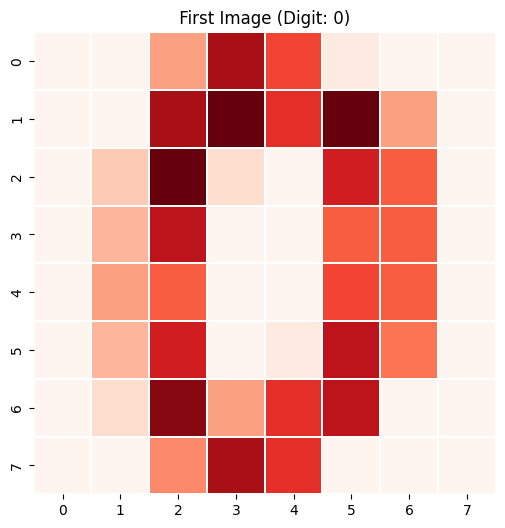

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Displaying the first image as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(digits.images[0], cmap='Reds', cbar=False, square=True, linewidths=0.005)
plt.title(" First Image (Digit: 0) ")
plt.show()


### Step 7.

The ```digits``` Bunch also contains an item called ```data```, which is also a numpy array.  In the code cell below, print out the shape of the data item.

#### Graded Cell

This cell is worth 5% of the grade for this assignment.

In [11]:
# Printing the shape of the 'data' array
data_shape = digits.data.shape
data_shape


(1797, 64)

### Step 8.

You should see that ```digits.data``` has shape (1797, 64).  This reflects the fact that for each of the 1797 hand-written images in the dataset, the 8 x 8 image array has been "flattened" into a one-dimensional data array of length 64, by concatenating each of the 8 rows one after the other.  (Within numpy, an n-dimensional array can be flattened into a one-dimensional array using the function <code>np.ravel</code>.)  A flattening like this is convenient to be able to feed data into a machine learning algorithm, since we can use the same algorithm for datasets of different dimensions.  No information is lost by this flattening procedure, except for the fact that if we were to plot out the flattened array, we probably would not be able to recognize what digit is encoded. In the code cell below, make a simple line plot using ```plt.plot``` of the one-dimensional data in array <code>digits.data[0]</code> to see what the flattened version of the data looks like.

#### Graded Cell

This cell is worth 5% of the grade for this assignment.

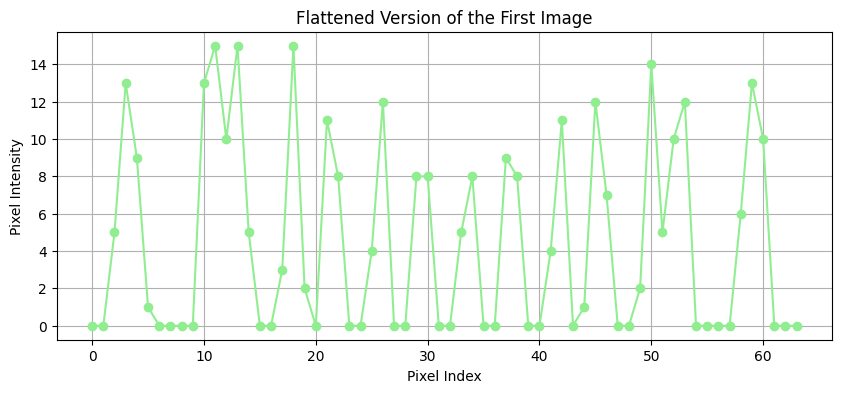

In [12]:
# Plotting the flattened version of the first image
plt.figure(figsize=(10, 4))
plt.plot(digits.data[0], marker='o', linestyle='-', color='lightgreen')
plt.title("Flattened Version of the First Image")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Intensity")
plt.grid(True)
plt.show()


### Step 9.

We've gone through multiple steps of interrogating the digits dataset, since this is typical in the process of developing a machine learning analysis, where one needs to understand the structure of the data and how the different data items relate to each other.  We're going to carry out a supervised learning classification of the data.

In this classification process, we are going to train a classifier on labeled examples, where the labels are the known values in the target array.  For example, the classifier will be instructed that the data in ```digits.data[0]``` corresponds to the digit 0, the data in ```digits.data[314]``` corresponds to the digit 6, etc.

The material in the sklearn tutorial on [Learning and predicting](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) describes this next phase of the process, which we will incorporate into the code cell below.

In the code cell below please perform the following tasks:

* Import the `svm` classifier from `sklearn`
* Creates an object of type SVC (Support Vector Classifier) and assigns it to the variable ```clf``` (short for classifier). Set Gamma to 0.01 and C to 100 which are hyperparameters that can be specified by the user before training. They define the classification boundary between classified and missclassified data points. We have selected some sample values for this assignment but in practice there are heuristics and cross-validation procedures to identify good values.
* Fits (trains) the data in all of the images and targets except for the last (```digits.data[:-1]```, which stops one item short of the last entry)


#### Graded Cell

This cell is worth 10% of the grade for this assignment.

In [14]:
# Importing the SVM classifier from sklearn
from sklearn.svm import SVC

# Creating an SVC object with specified hyperparameters
clf = SVC(gamma=0.01, C=100)

# Fitting the classifier using all images and targets except the last
clf.fit(digits.data[:-1], digits.target[:-1])

print("Classifier trained successfully!")


Classifier trained successfully!


### Step 10.

Having fit the classifier on all but the last image, we can now try to predict the digit associated with the last image, by calling the ```predict``` method on our classifier ```clf```.

In the code cell below:

- Apply the trained model to recognize the digit in the last image and print the digit.
- Make a heatmap plot of the last image in the dataset.  Does it look like the number 8?  The sklearn tutorial notes: "As you can see, it is a challenging task: after all, the images are of poor resolution. Do you agree with the classifier?"

#### Graded Cell

This cell is worth 10% of the grade for this assignment.

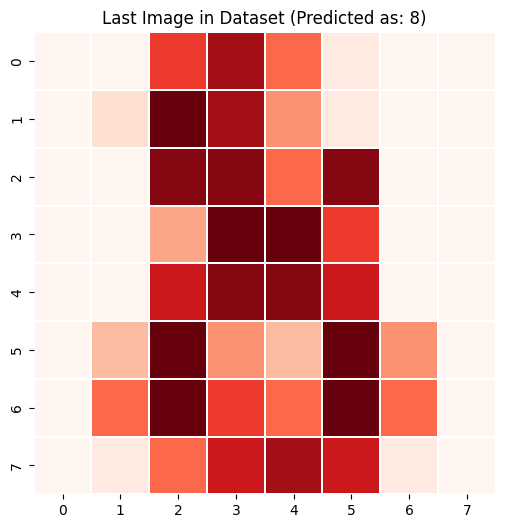

predicted_digit_value:  8


In [16]:
# Predicting the digit for the last image in the dataset
predicted_digit = clf.predict([digits.data[-1]])

# Printing the predicted digit
predicted_digit_value = predicted_digit[0]

# Plotting the last image as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(digits.images[-1], cmap='Reds', cbar=False, square=True, linewidths=0.2)
plt.title(f"Last Image in Dataset (Predicted as: {predicted_digit_value})")
plt.show()

print( "predicted_digit_value: ", predicted_digit_value)


### Step 11.

The last digit in the dataset was *predicted* to be 8, based on the trained classifier. In the code cell below, write an expression that assigns to the variable <code>true_last_digit</code> the true value of the last digit in the dataset, by extracting the relevant value out of the <code>digits</code> object.

#### Graded Cell

This cell is worth 20% of the grade for this assignment.

In [18]:
# Assigning the true value of the last digit in the dataset to the variable true_last_digit
true_last_digit = digits.target[-1]


print("true_last_digit: ", true_last_digit)


true_last_digit:  8


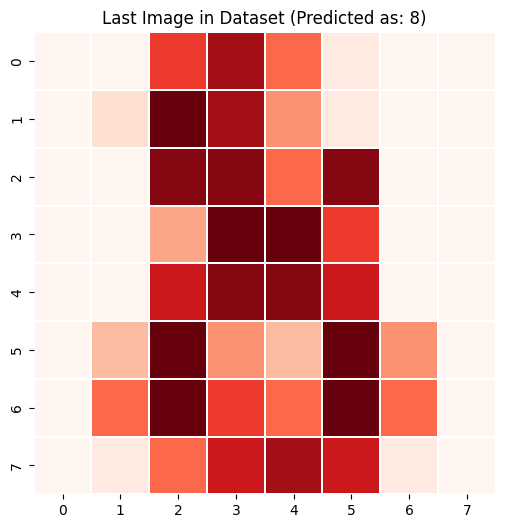

In [19]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the last image is correctly predicted as 8 in the previous steps
# Replace this with the actual predicted digit if needed
predicted_digit_value = 8

plt.figure(figsize=(6, 6))
sns.heatmap(digits.images[-1], cmap='Reds', cbar=False, square=True, linewidths=0.2)
plt.title(f"Last Image in Dataset (Predicted as: {predicted_digit_value})")
plt.show()

### Step 12.

In the example above, we trained the classifier using all but one example, and then tried to predict the digit for that last remaining example.  That is just one of many possible workflows, using a particular split of training and testing data.  For example, we could instead train on all but the last 100 examples, and then predict the last 100 examples using that model.  

In the code cell below, fit the ```clf``` classifier on all but the last 100 examples, and then predict the digits for the last 100 examples. Save your result to the variable `predict_last_100`, and print out the value of that variable so that you can observe the set of predictions made for this test dataset.

#### Graded Cell

This cell is worth 20% of the grade for this assignment.

In [20]:
# Fitting the classifier on all but the last 100 examples
clf.fit(digits.data[:-100], digits.target[:-100])

# Predicting the digits for the last 100 examples
predict_last_100 = clf.predict(digits.data[-100:])

# Printing the predictions for the last 100 examples
print("Predictions for the last 100 examples:")
print(predict_last_100)



Predictions for the last 100 examples:
[0 9 5 5 6 5 0 9 8 9 8 8 1 8 7 3 5 1 8 8 2 2 7 8 2 8 8 8 6 8 8 8 8 8 4 8 6
 8 8 9 1 5 0 9 5 8 8 2 8 0 8 7 6 8 2 8 8 8 6 3 1 3 9 1 7 6 8 4 8 1 8 8 5 3
 6 9 6 1 7 5 4 8 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


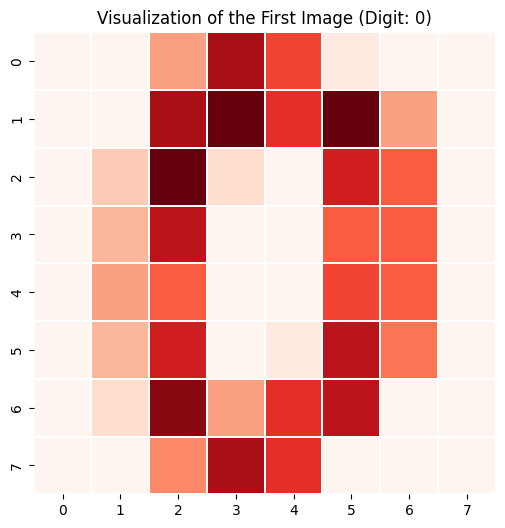

Predictions for the last 100 examples:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [25]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'digits' is already loaded as in the provided code.

# Displaying the first image as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(digits.images[0], cmap='Reds', cbar=False, square=True, linewidths=0.2)
plt.title("Visualization of the First Image (Digit: 0)")
plt.show()

print("Predictions for the last 100 examples:")
print(digits.images[0])

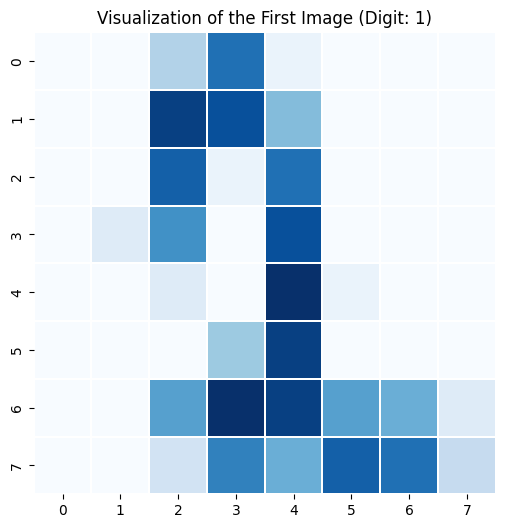

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'digits' is already loaded as in the provided code.

# Displaying the first image as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(digits.images[12], cmap='Blues', cbar=False, square=True, linewidths=0.2)
plt.title("Visualization of the First Image (Digit: 1)")
plt.show()


-



-

-

-

-

-

-